<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ИЗУЧИТЬ-ДАННЫЕ" data-toc-modified-id="ИЗУЧИТЬ-ДАННЫЕ-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ИЗУЧИТЬ ДАННЫЕ</a></span></li><li><span><a href="#ПРЕДОБРАБОТКА-ДАННЫХ" data-toc-modified-id="ПРЕДОБРАБОТКА-ДАННЫХ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ПРЕДОБРАБОТКА ДАННЫХ</a></span><ul class="toc-item"><li><span><a href="#Проверим-корректность-всех-пунктов-технического-задания." data-toc-modified-id="Проверим-корректность-всех-пунктов-технического-задания.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверим корректность всех пунктов технического задания.</a></span></li></ul></li><li><span><a href="#ИССЛЕДОВАТЕЛЬСКИЙ-АНАЛИЗ-ДАННЫХ" data-toc-modified-id="ИССЛЕДОВАТЕЛЬСКИЙ-АНАЛИЗ-ДАННЫХ-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ</a></span></li><li><span><a href="#ВЫВОД" data-toc-modified-id="ВЫВОД-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ВЫВОД</a></span></li></ul></div>

# A/B - тестирование  изменений, связанных с внедрением улучшенной рекомендательной системы
**Финальный проект**

ЦЕЛЬ — провести оценку результатов A/B-теста. 

Оцените корректность проведения теста и проанализируйте его результаты
(удостоверьтесь, что нет пересечений с конкурирующим тестом и нет пользователей, участвующих в двух группах теста одновременно;
проверьте равномерность распределения пользователей по тестовым группам и правильность их формирования).


ДАННЫЕ:Датасет с действиями пользователей, техническое задание и несколько вспомогательных датасетов.

ab_project_marketing_events.csv
final_ab_new_users.csv
final_ab_events.csv
final_ab_participants.csv

/datasets/ab_project_marketing_events.csv — календарь маркетинговых событий на 2020 год;
Структура файла:
name — название маркетингового события;
regions — регионы, в которых будет проводиться рекламная кампания;
start_dt — дата начала кампании;
finish_dt — дата завершения кампании.

/datasets/final_ab_new_users.csv — все пользователи, зарегистрировавшиеся в интернет-магазине в период с 7 по 21 декабря 2020 года;
Структура файла:
user_id — идентификатор пользователя;
first_date — дата регистрации;
region — регион пользователя;
device — устройство, с которого происходила регистрация.

/datasets/final_ab_events.csv — все события новых пользователей в период с 7 декабря 2020 по 4 января 2021 года;
Структура файла:
user_id — идентификатор пользователя;
event_dt — дата и время события;
event_name — тип события;
details — дополнительные данные о событии. Например, для покупок, purchase, в этом поле хранится стоимость покупки в долларах.

/datasets/final_ab_participants.csv — таблица участников тестов.
Структура файла:
user_id — идентификатор пользователя;
ab_test — название теста;
group — группа пользователя.

ТЕХНИЧЕСКОЕ ЗАДАНИЕ
Название теста: recommender_system_test;
Группы: А (контрольная), B (новая платёжная воронка);
Дата запуска: 2020-12-07;
Дата остановки набора новых пользователей: 2020-12-21;
Дата остановки: 2021-01-04;
Аудитория: 15% новых пользователей из региона EU;
Назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;
Ожидаемое количество участников теста: 6000.
Ожидаемый эффект: за 14 дней с момента регистрации в системе пользователи покажут улучшение каждой метрики не менее, чем на 10%:
конверсии в просмотр карточек товаров — событие product_page
просмотры корзины — product_cart
покупки — purchase.
Загрузите данные теста, проверьте корректность его проведения и проанализируйте полученные результаты.


ДЕКОМПОЗИЦИЯ: 
1 ИЗУЧИТЬ ДАННЫЕ Открыть файл с данными и изучить общую информацию. 
2 ПРЕДОБРАБОТКА ДАННЫХ 
2.1 Проверка на пропуски. 
2.3 Преобразование типов данных. 
2.4 Проверка на дубликаты явные/неявные.
2.5 Проверка на аномалии в данных.
2.6 Оценка корректности проведенеия теста.
2.7 Проверка на соответствие данных требованиям технического задания.

3 ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ. 
3.1 Проверка количества событий на пользователя (одинаково распределены в выборках?).
3.2 Как число событий в выборках распределено по дням?
3.3 Как меняется конверсия в воронке в выборках на разных этапах? 
3.4 Какие особенности данных нужно учесть, прежде чем приступать к A/B-тестированию?
3.5 Провести оценку результатов A/B-тестирования:
    Что можно сказать про результаты A/B-тестирования?
    Проверить статистическую разницу долей z-критерием.
3.6 Вывод по этапу исследовательского анализа данных и по проведённой оценке результатов A/B-тестирования.
 
4 ОБЩИЙ ВЫВОД Сделать общее заключение о корректности проведения теста.


In [70]:

#импорт библиотек
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import math as mth
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from pandas.plotting import register_matplotlib_converters
from plotly import graph_objects as go
from scipy import stats as st
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

## ИЗУЧИТЬ ДАННЫЕ 

Откроем календарь маркетинговых событий на 2020 год;
Структура файла:
name — название маркетингового события;
regions — регионы, в которых будет проводиться рекламная кампания;
start_dt — дата начала кампании;
finish_dt — дата завершения кампании.

In [71]:
#откроем файл с данными
marketing=pd.read_csv('/datasets/ab_project_marketing_events.csv',sep=',')
marketing

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


Откроем файл со всеми пользователями, зарегистрировавшимися в интернет-магазине в период с 7 по 21 декабря 2020 года;
Структура файла:
user_id — идентификатор пользователя;
first_date — дата регистрации;
region — регион пользователя;
device — устройство, с которого происходила регистрация.

In [72]:
#откроем файл с данными
users=pd.read_csv('/datasets/final_ab_new_users.csv',sep=',')
users.head(5)

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


Откроем файл со всеми событиями новых пользователей в период с 7 декабря 2020 по 4 января 2021 года;
Структура файла:
user_id — идентификатор пользователя;
event_dt — дата и время события;
event_name — тип события;
details — дополнительные данные о событии. Например, для покупок, purchase, в этом поле хранится стоимость покупки в долларах.

In [73]:
#откроем файл с данными
events=pd.read_csv('/datasets/final_ab_events.csv',sep=',')
events

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
440312,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
440313,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
440314,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
440315,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


Откроем таблицу участников тестов.
Структура файла:
user_id — идентификатор пользователя;
ab_test — название теста;
group — группа пользователя.

In [74]:
#откроем файл с данными
participants=pd.read_csv('/datasets/final_ab_participants.csv',sep=',')
participants

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test
...,...,...,...
18263,1D302F8688B91781,B,interface_eu_test
18264,3DE51B726983B657,A,interface_eu_test
18265,F501F79D332BE86C,A,interface_eu_test
18266,63FBE257B05F2245,A,interface_eu_test


## ПРЕДОБРАБОТКА ДАННЫХ

In [75]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


В таблице 4 столбца, 14 строк. 
Типы данных:строки object.
Нужно заменить типы следующих столбцов:start_dt,finish_dt-на дату . Пропусков в столбцах нет.

In [76]:
#Преобразуем тип данных в столбцах 'start_dt','finish_dt'

marketing['start_dt'] = pd.to_datetime(marketing['start_dt'])
marketing['finish_dt'] = pd.to_datetime(marketing['finish_dt'])


In [77]:
#проверим данные на явные дубликаты
marketing.duplicated().sum()

0

In [78]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


В таблице 4 столбца, 61733 строк. 
Типы данных:строки object.
Нужно заменить типы следующих столбцов:first_date-на дату . Пропусков в столбцах нет.

In [79]:
#проверим данные на явные дубликаты
users.duplicated().sum()

0

In [80]:
users['first_date'] = pd.to_datetime(users['first_date'])

In [81]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


In [82]:
events['details'].isna().sum()

377577

In [83]:
events['details'].value_counts()

4.99      46362
9.99       9530
99.99      5631
499.99     1217
Name: details, dtype: int64

В таблице 4 столбца, 440317 строк. 
Типы данных:строки object.
Нужно заменить типы следующих столбцов:event_dt -на дату . Пропуски есть в столбце details 377577 (дополнительные данные о событии).
Пропуски оставим незаполненные, по видимому не было доп.информации по этим строкам.

In [84]:
events['event_dt'] = pd.to_datetime(events['event_dt'])

In [85]:
#проверим данные на явные дубликаты
events.duplicated().sum()

0

In [86]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


В таблице 3 столбца, 18268 строк. 
Типы данных:строки object.
Пропусков нет.

In [87]:
#проверим данные на явные дубликаты
participants.duplicated().sum()

0

### Проверим корректность всех пунктов технического задания.

Время проведения теста. 

Откроем календарь маркетинговых событий за 2020 год. По ТЗ:
Дата запуска: 2020-12-07;
Дата остановки: 2021-01-04.
Посмотрим какие еще акции попадают на эти даты.

In [88]:
marketing.sort_values(by='start_dt')

,name,regions,start_dt,finish_dt
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11
11,Dragon Boat Festival Giveaway,APAC,2020-06-25,2020-07-01
4,4th of July Promo,N.America,2020-07-04,2020-07-11
13,Chinese Moon Festival,APAC,2020-10-01,2020-10-07


In [89]:
marketing_corr=marketing.query('(start_dt<="2021-01-04")&(finish_dt>="2020-12-07")')
marketing_corr

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
10,CIS New Year Gift Lottery,CIS,2020-12-30,2021-01-07


Во время проведения теста проходят 2 акции:
    Christmas&New Year Promo	EU, N.America (Рождественская новогодняя акция в Европе и Сев. Америке продлится 9 дней, все эти дни попадают на наш тест) 
    CIS New Year Gift Lottery	CIS (Новогодняя подарочная лотерея СНГ продлится 8 дней, 5 из них выпадают на тест)
    Т.к по ТЗ нас интересует регион EU. Может оказать влияние на тест только акция  Christmas&New Year Promo.
    
Скорее всего  Christmas&New Year Promo будет влиять на обе группы тестирования в равной степени. Нужно посмотреть был ли всплеск событий в даты проведения акции Christmas&New Year Prom

Посмотрим распределение событий в эти даты

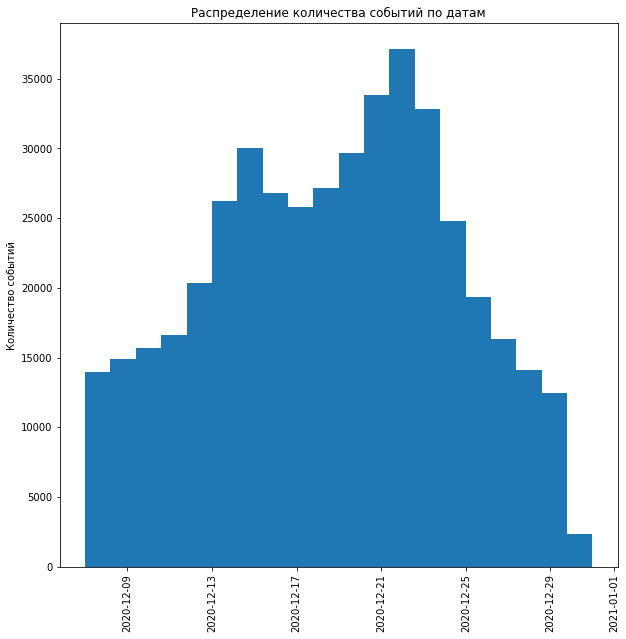

In [90]:
#Построим гистограмму по дате и времени. 
plt.figure(figsize=(10, 10))
plt.hist(events['event_dt'], bins=20)
plt.xticks(rotation=90)
plt.title('Распределение количества событий по датам')
plt.ylabel('Количество событий')
plt.show()

Во время проведения теста проходит Christmas&New Year Promo	EU, N.America с 2020-12-25 по 2021-01-03.
с 25-29 декабря всплеска событий не наблюдается.


Проверим пользователей из датасета users, зарегистрировавшихся с 2020-12-07 до
даты остановки набора новых пользователей: 2020-12-21

In [91]:
users['first_date'].min()


Timestamp('2020-12-07 00:00:00')

In [92]:
users['first_date'].max()

Timestamp('2020-12-23 00:00:00')

Последняя дата регистрации пользователя 2020-12-23. Отфильтруем данные до 2020-12-21.

In [93]:
users=users.query('first_date<="2020-12-21"')
users['first_date'].max()

Timestamp('2020-12-21 00:00:00')

Откроем файл со всеми событиями новых пользователей в период с 7 декабря 2020 по 4 января 2021 года и проверим на соответствие ТЗ по датам.

In [94]:
events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [95]:
events['event_dt'].min()

Timestamp('2020-12-07 00:00:33')

In [96]:
events['event_dt'].max()

Timestamp('2020-12-30 23:36:33')

События events по ТЗ должны быть по 4 января 2021 года. Возможно произошел сбой и не удалось записать данные за последующие даты.


Посмотрим аудиторию теста. 

In [97]:
#посмотрим столбец seats
users['region'].value_counts()

EU           42340
N.America     8347
CIS           2900
APAC          2883
Name: region, dtype: int64

Удостоверимся, что нет пересечений с конкурирующим тестом и нет пользователей, участвующих в двух группах теста одновременно.
Название теста: recommender_system_test;
Группы: А (контрольная), B (новая платёжная воронка).

In [98]:
participants['ab_test'].value_counts()


interface_eu_test          11567
recommender_system_test     6701
Name: ab_test, dtype: int64

In [99]:

participants_corr=participants.query('ab_test=="recommender_system_test"')
participants_corr

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test
...,...,...,...
6696,053FB26D6D49EDDC,A,recommender_system_test
6697,9D263B8EF15CF188,B,recommender_system_test
6698,F2FBBA33F37DEC46,A,recommender_system_test
6699,29C92313A98B1176,B,recommender_system_test


In [100]:
participants_corr['user_id'].nunique()

6701

In [101]:
part=participants_corr.groupby('group')['user_id'].nunique().reset_index()
part['mean']=round(part['user_id']*100/(part['user_id'].sum()))
part.columns=['группа','пользователи','доля,%']
part

,группа,пользователи,"доля,%"
0,A,3824,57.0
1,B,2877,43.0


В группе А 3824 уникальных пользователя. В группе В 2877.
Всего 6701 пользователей, значит нет пользователей, попавших в обе группы . В группе A больше пользователей, чем в B на 14%

Проверим пересечение пользователей в разных тестах.

In [102]:
part1=participants.groupby(['ab_test','group'])['user_id'].nunique().reset_index()
part1

,ab_test,group,user_id
0,interface_eu_test,A,5831
1,interface_eu_test,B,5736
2,recommender_system_test,A,3824
3,recommender_system_test,B,2877


In [103]:
participants['user_id'].nunique()

16666

In [104]:
part1['user_id'].sum()

18268

In [105]:
(part1['user_id'].sum())-(participants['user_id'].nunique())

1602

1602 пользователя участвуют в recommender_system_test и interface_eu_test тестах одновременно.

Посмотрим как они распределены по группам. Если пользователи попали в контрольную группу А конкурирующего теста, их оставим, так как на нее не оказывается никакого влияния.
Рассмотрим подробнее пользователей, попавших в группу В 'interface_eu_test' теста.

Выберем из таблицы пользователей, попавших в оба теста одновременно.

In [106]:
user2=participants.groupby('user_id').agg({'ab_test':'nunique'}).query('ab_test == 2 ').reset_index()
user2

,user_id,ab_test
0,001064FEAAB631A1,2
1,00341D8401F0F665,2
2,003B6786B4FF5B03,2
3,0082295A41A867B5,2
4,00E68F103C66C1F7,2
...,...,...
1597,FF7BE2897FC0380D,2
1598,FF9A81323FA67D6E,2
1599,FFC53FD45DDA5EE8,2
1600,FFED90241D04503F,2


In [107]:
user2_table=user2.merge(participants, on='user_id').reset_index()
user2_table

,index,user_id,ab_test_x,group,ab_test_y
0,0,001064FEAAB631A1,2,B,recommender_system_test
1,1,001064FEAAB631A1,2,B,interface_eu_test
2,2,00341D8401F0F665,2,A,recommender_system_test
3,3,00341D8401F0F665,2,A,interface_eu_test
4,4,003B6786B4FF5B03,2,A,recommender_system_test
...,...,...,...,...,...
3199,3199,FFC53FD45DDA5EE8,2,A,interface_eu_test
3200,3200,FFED90241D04503F,2,B,recommender_system_test
3201,3201,FFED90241D04503F,2,B,interface_eu_test
3202,3202,FFF28D02B1EACBE1,2,B,recommender_system_test


In [108]:
user4=user2_table.query('ab_test_y == "interface_eu_test" & group=="B"')
user4


,index,user_id,ab_test_x,group,ab_test_y
1,1,001064FEAAB631A1,2,B,interface_eu_test
7,7,0082295A41A867B5,2,B,interface_eu_test
9,9,00E68F103C66C1F7,2,B,interface_eu_test
13,13,010DB4614355A4BB,2,B,interface_eu_test
19,19,020A95B66F363AFB,2,B,interface_eu_test
...,...,...,...,...,...
3187,3187,FEC0BCA6C323872F,2,B,interface_eu_test
3189,3189,FEE7040D7D2F2968,2,B,interface_eu_test
3195,3195,FF7BE2897FC0380D,2,B,interface_eu_test
3197,3197,FF9A81323FA67D6E,2,B,interface_eu_test


In [109]:
user3_table=user2_table.merge(user4, on='user_id').reset_index()
user3_table

,index,index_x,user_id,ab_test_x_x,group_x,ab_test_y_x,index_y,ab_test_x_y,group_y,ab_test_y_y
0,0,0,001064FEAAB631A1,2,B,recommender_system_test,1,2,B,interface_eu_test
1,1,1,001064FEAAB631A1,2,B,interface_eu_test,1,2,B,interface_eu_test
2,2,6,0082295A41A867B5,2,A,recommender_system_test,7,2,B,interface_eu_test
3,3,7,0082295A41A867B5,2,B,interface_eu_test,7,2,B,interface_eu_test
4,4,8,00E68F103C66C1F7,2,A,recommender_system_test,9,2,B,interface_eu_test
...,...,...,...,...,...,...,...,...,...,...
1561,1561,3195,FF7BE2897FC0380D,2,B,interface_eu_test,3195,2,B,interface_eu_test
1562,1562,3196,FF9A81323FA67D6E,2,B,recommender_system_test,3197,2,B,interface_eu_test
1563,1563,3197,FF9A81323FA67D6E,2,B,interface_eu_test,3197,2,B,interface_eu_test
1564,1564,3200,FFED90241D04503F,2,B,recommender_system_test,3201,2,B,interface_eu_test


In [110]:
user3_table=user3_table[['user_id','group_x', 'ab_test_y_x']]
user3_table=user3_table.query('ab_test_y_x=="recommender_system_test"')

In [111]:
userab=user3_table.groupby(['ab_test_y_x','group_x'])['user_id'].nunique().reset_index()
userab['mean']=round(userab['user_id']*100/(userab['user_id'].sum()))
userab.columns=['тест', 'группа','пользователи','доля,%']
userab

,тест,группа,пользователи,"доля,%"
0,recommender_system_test,A,439,56.0
1,recommender_system_test,B,344,44.0


Пользователи группы В 'interface_eu_test' теста распределены равномерно в нашем тесте 'recommender_system_test' на группы А и В, и пользователи конкурирующего теста окажут примерно одинаковое влияние на пользователей обеих групп нашего теста. 
Поэтому не будем удалять пользователей попавших в оба теста одновременно.

Проверим пункт ТЗ 
"Аудитория: 15% новых пользователей из региона EU".

Посчитаем сколько процентов составляют участники нашего теста из EU.

Найдем количество участников теста из EU. Соединим 2 таблицы.

In [112]:
new_table=participants_corr.merge(users, on='user_id').reset_index()
new_table.head()


,index,user_id,group,ab_test,first_date,region,device
0,0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC
1,1,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone
2,2,DABC14FDDFADD29E,A,recommender_system_test,2020-12-08,EU,Mac
3,3,04988C5DF189632E,A,recommender_system_test,2020-12-14,EU,iPhone
4,4,482F14783456D21B,B,recommender_system_test,2020-12-14,EU,PC


In [113]:
eu_ab=new_table.groupby('region')['user_id'].nunique().reset_index()
eu_ab

,region,user_id
0,APAC,72
1,CIS,55
2,EU,6351
3,N.America,223


Посмотрим сколько всего пользователей зарегистрировалось из региона EU.


In [114]:
eu=users.groupby('region')['user_id'].nunique().reset_index()


In [115]:
eu['part']=eu_ab['user_id']/eu['user_id']
eu

,region,user_id,part
0,APAC,2883,0.024974
1,CIS,2900,0.018966
2,EU,42340,0.150000
3,N.America,8347,0.026716


Всего зарегистрированных пользователей из EU 42340, 6351 пользователь принимает участие в тесте из региона EU.
Аудитория: 15% новых пользователей из региона EU соответствует ТЗ.

Ожидаемое количество участников теста: 6000 также соответстует ТЗ (6351)

In [116]:
new_table=new_table.query('region=="EU"')


## ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ

Сделаем финальную таблицу очищенных данных

In [117]:

ab_test= pd.merge(new_table, events, on='user_id', how='left')
ab_test.head()

,index,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details
0,0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,purchase,99.99
1,0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:56,purchase,4.99
2,0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:29,product_cart,NaN
3,0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:57,product_cart,NaN
4,0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,product_page,NaN


In [118]:
ab_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26290 entries, 0 to 26289
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       26290 non-null  int64         
 1   user_id     26290 non-null  object        
 2   group       26290 non-null  object        
 3   ab_test     26290 non-null  object        
 4   first_date  26290 non-null  datetime64[ns]
 5   region      26290 non-null  object        
 6   device      26290 non-null  object        
 7   event_dt    23420 non-null  datetime64[ns]
 8   event_name  23420 non-null  object        
 9   details     3196 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 2.2+ MB


In [119]:
#Сколько всего событий в логе
ab_test['event_name'].count()

23420

In [120]:
#Сколько всего пользователей в логе
len(ab_test['user_id'].unique())


6351

Количество событий на пользователя одинаково распределены в выборках?

In [121]:
ab_test.query('group=="B"').groupby('user_id')['event_name'].count().mean()

1.881118881118881

In [122]:
ab_test.query('group=="A"').groupby('user_id')['event_name'].count().mean()

5.0382498624105665

Количество событий на пользователя в выборках распределены не одинаково. На 1 пользователя группы А в среднем 5 событий, группы В 1,8.

Посчитаем для каждого пользователя количество событий

In [123]:
count_event=ab_test.groupby(['group','user_id'])['event_name'].count().reset_index()
count_event

,group,user_id,event_name
0,A,000ABE35EE11412F,0
1,A,0010A1C096941592,12
2,A,001C05E87D336C59,0
3,A,00341D8401F0F665,2
4,A,003B6786B4FF5B03,0
...,...,...,...
6346,B,FFB3F647898BA928,0
6347,B,FFC2C5F898D1245B,0
6348,B,FFC53FD45DDA5EE8,0
6349,B,FFED90241D04503F,0


Посмотрим среднее число событий на пользователя только для тех, которые совершали события.

In [124]:
count_event=count_event.query('event_name!=0')
count_event.query('group=="A"')['event_name'].mean()

7.03110599078341

In [125]:
count_event.query('group=="B"')['event_name'].mean()

5.827822120866591

Среднее число событий на пользователя только для тех, которые совершали события в группе А-7, в группе В 5,8.

Построим гистограмму распределения

In [126]:
b=ab_test.query('group=="B"').groupby('user_id')['event_name'].count()
a=ab_test.query('group=="A"').groupby('user_id')['event_name'].count()
a

user_id
000ABE35EE11412F     0
0010A1C096941592    12
001C05E87D336C59     0
00341D8401F0F665     2
003B6786B4FF5B03     0
                    ..
FF5A1CD38F5DD996    10
FF5B24BCE4387F86     9
FF825C1D791989B5     8
FFAE9489C76F352B     6
FFE858A7845F005E     0
Name: event_name, Length: 3634, dtype: int64

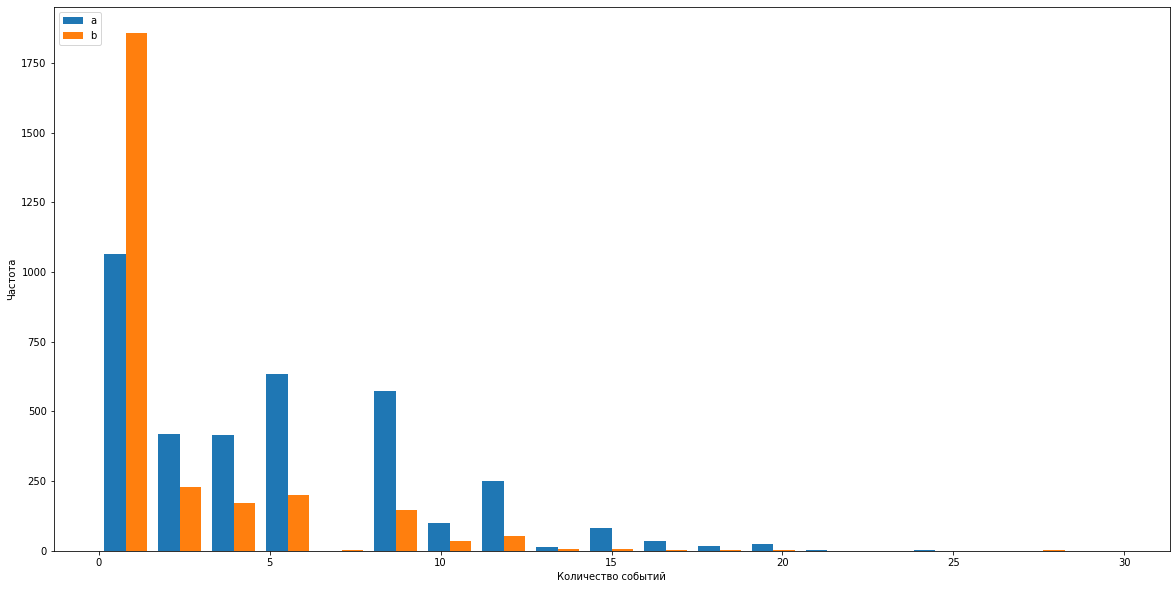

In [127]:
plt.figure(figsize=(20,10))
bins = np.linspace(0, 30, 20)

plt.hist([a, b], bins, label=['a', 'b'])
plt.legend(loc='upper left')
plt.xlabel('Количество событий')
plt.ylabel('Частота')
plt.show()


Количество событий распределено не равномерно. Много нулевых событий, в группе А больше событий, чем в группе В.
Больше всего от 5-10 событий совершено пользователями.

Как число событий в выборках распределено по дням?

In [128]:
ab_test['event_dt'] = pd.to_datetime(ab_test['event_dt'], format='%Y-%m-%dT')
ab_test['event_dt']=ab_test['event_dt'].dt.date

In [129]:
data_cor= ab_test.pivot_table(index=['event_dt','group'], values='event_name', aggfunc='count').reset_index()


In [130]:
fig = px.bar(data_cor, # загружаем данные и заново их сортируем
             x='event_dt',# указываем столбец с данными для оси X
             y='event_name', # указываем столбец с данными для оси Y
             text='event_name', # добавляем аргумент, который отобразит текст с информацией
             color='group')

# оформляем график
fig.update_layout(title='Распределение количества событий по дням',
                   xaxis_title='Дата',
                   yaxis_title='Количество событий')
fig.show() # выводим график

Больше всего событий было совершено 21 декабря.

Посмотрим, какие события есть в логах, как часто они встречаются. Отсортируем события по частоте.

In [131]:
data_b = ab_test.pivot_table(index=['event_name','group'], values='user_id',aggfunc = {'user_id':'nunique'}).reset_index()
data_b

,event_name,group,user_id
0,login,A,2604
1,login,B,877
2,product_cart,A,782
3,product_cart,B,244
4,product_page,A,1685
5,product_page,B,493
6,purchase,A,833
7,purchase,B,249


In [132]:



fig = px.bar(data_b.sort_values(by='user_id', ascending=False), # загружаем данные и заново их сортируем
             x='event_name',# указываем столбец с данными для оси X
             y='user_id', # указываем столбец с данными для оси Y
             text='user_id', # добавляем аргумент, который отобразит текст с информацией
             color='group')
# оформляем график
fig.update_layout(title='Распределение количества событий по дням',
                   xaxis_title='Дата',
                   yaxis_title='Количество событий')
fig.show() # выводим график

Чаще всего встречается событие login, самое редкое событие product_cart.
Не получается логическая цепочка событий: Регистрация-карточки товаров-корзина-оплата.
Событий у группы А больше, чем у В.

Посмотрим как меняется конверсия в воронке в выборках на разных этапах?

In [133]:
 fig = go.Figure(go.Funnel(
    y = ["login", "product_page", "Product_cart", "purchase"],
    x = [2604, 1685, 782, 833],
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.65))
fig.update_layout(title="Доля пользователей группы А, которая проходит на следующий шаг воронки")
fig.show()

Группа А:
Со страницы регистрации в карточки товаров переходят 65% пользователей, из карточек товаров к покупке переходит 32% пользователей, 
к корзине переходит 30% пользователей.

Больше всего пользователей теряется на первом и втором шаге (35% и 33%). Пользователи могут переходить со страницы карточки товаров в оплату,минуя корзину.
Доля пользователей от первого события до оплаты 32%.

In [134]:
fig = go.Figure(go.Funnel(
    y = ["login", "product_page", "Product_cart", "purchase"],
    x = [877, 493, 244, 249],
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.65))
fig.update_layout(title="Доля пользователей группы В, которая проходит на следующий шаг воронки")
fig.show()

 Группа В:
 Со страницы регистрации в карточки товаров переходят 56% пользователей, из карточек товаров к покупке переходит 28% пользователей, из оплаты к корзине переходит 28% пользователей.

Больше всего пользователей теряется на первом и втором шаге (44% и 28%). Нарушена логическая цепочка шагов Авторизация-карточки товаров-корзина-оплата.
Видимо есть покупка в 1 клик.
Доля пользователей от первого события до оплаты 28%.

Ожидаемый эффект не виден:пользователи  не показали улучшение каждой метрики не менее, чем на 10%.


Какие особенности данных нужно учесть, прежде чем приступать к A/B-тестированию:

Перед тем как начать A/B-тест, нужно убедиться, что:

- на результаты не влияют аномалии и выбросы в генеральной совокупности;
- инструмент «деления» трафика работает безошибочно;
- данные отправляются в системы аналитики корректно.
Перед А/В тестом проводят A/A-тест. Если трафик и инструмент проведения A/A-теста не подвели,
различий в показателях не будет и поможет определить длительность теста и методику анализа данных.
Критерии успешного A/A-теста:

- Количество пользователей в различных группах различается не более, чем на 1%;
- Для всех групп фиксируют и отправляют в системы аналитики данные об одном и том же;
- Различие ключевых метрик по группам не превышает 1% и не имеет статистической значимости;
- Попавший в одну из групп посетитель остаётся в этой группе до конца теста.
Если пользователь видит разные версии исследуемой страницы в ходе одного исследования,
неизвестно, какая именно повлияла на его решения. Значит, и результаты такого теста нельзя интерпретировать однозначно.

В данных нет информации о проведении  A/A-теста. Считать проведенный А/В тест успешным нельзя.

Оценка результатов A/B-тестирования.

Проверим статистическую разницу долей z-критерием.

Посмотрим сколько пользователей в каждой экспериментальной группе

In [135]:
users_group = ab_test.groupby('group')['user_id'].agg('nunique').reset_index()

users_group.sort_values(by='user_id', ascending=False)

,group,user_id
0,A,3634
1,B,2717


Количество пользователей в группах не одинаковое (разница 14%). Количество пользователей в каждой из групп достаточное для проведения исследования,есть небольшая разница между размерами групп.

Сделаем общую таблицу с числом уникальных пользователей по каждому событию и группе

In [136]:
data_a = ab_test.pivot_table(index='event_name', columns= 'group', values='user_id',aggfunc = {'user_id':'nunique'}).reset_index()
data_a

group,event_name,A,B
0,login,2604,877
1,product_cart,782,244
2,product_page,1685,493
3,purchase,833,249


Проверим, будет ли отличие между группами статистически достоверным.

гипотеза Н0: равные доли в обеих группах гипотеза Н1: доли выборках не равны

Напишем функцию для проверки гипотез и проверим по всем событиям

In [137]:


def check_hypothesis(successes1, successes2, trials1, trials2, alpha=0.05):


    # число пользователей в группе 1 и группе 2:
    
    trials = np.array([trials1,trials2]) 
         
    # число пользователей, совершивших событие в группе 1 и группе 2
    successes = np.array([successes1, successes2]) 
    # пропорция успехов в первой группе:
    p1 = successes[0]/trials[0]
    # пропорция успехов во второй группе:
    p2 = successes[1]/trials[1]
    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
    # разница пропорций в датасетах
    difference = p1 - p2
 
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1]))
    
    distr = st.norm(0, 1) 
    
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    
    print(event)
    print('p-значение: ', p_value)
    
    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
        print('')
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")
        print('')

In [138]:
for event in ['login', 'product_cart',
       'product_page', 'purchase']:
    successes1=data_a[data_a['event_name']==event]['A']
    successes2=data_a[data_a['event_name']==event]['B']
    check_hypothesis(successes1, successes2,  users_group.loc[0,'user_id'], users_group.loc[1,'user_id'], alpha=0.05)

login
p-значение:  [0.]
Отвергаем нулевую гипотезу: между долями есть значимая разница

product_cart
p-значение:  [0.]
Отвергаем нулевую гипотезу: между долями есть значимая разница

product_page
p-значение:  [0.]
Отвергаем нулевую гипотезу: между долями есть значимая разница

purchase
p-значение:  [0.]
Отвергаем нулевую гипотезу: между долями есть значимая разница



## ВЫВОД

Во время проведения теста проходит Christmas&New Year Promo EU, N.America с 2020-12-25 по 2021-01-03.
Хотя 25-29 декабря всплеска событий не наблюдается.Возможно на обе группы одновременно акция оказала влияние. 
Лучше проводить тестирование, когда нет глобальных ауций, распродаж,сезонности.

События events по ТЗ должны быть по 4 января 2021 года, а в данных конечная дата '2020-12-30 23:36:33'.
Возможно произошел сбой и не удалось записать данные за последующие даты, что тоже повллияло на успешность проведения теста.

1602 пользователя участвуют в recommender_system_test и interface_eu_test тестах одновременно, 
что возможно тоже оказало влияние на успешность проведения теста.

В группе А 3824 уникальных пользователя. В группе В 2877. Всего 6701 пользователей, значит нет пользователей, попавших в обе группы .
В группе A больше пользователей, чем в B на 14%.


Всего зарегистрированных пользователей из EU 42340, 6351 пользователь принимает участие в тесте из региона EU.
Аудитория: 15% новых пользователей из региона EU соответствует ТЗ.
    
Ожидаемое количество участников теста: 6000 также соответстует ТЗ (6351)
Всего совершенных событий: 23420.

Количество событий на пользователя в выборках распределены не одинаково. 
На 1 пользователя группы А в среднем 5 событий, группы В 1,8.
Среднее число событий на пользователя только для тех, которые совершали события в группе А-7, в группе В 5,8.

Много нулевых событий, в группе А больше событий, чем в группе В. Чаще всего от 5-10 событий совершено пользователями.
Больше всего событий было совершено 21 декабря.

Не получается логическая цепочка событий: Регистрация-карточки товаров-корзина-оплата.
Конверсии по группам:   
Группа А:
Со страницы регистрации в карточки товаров переходят 65% пользователей, из карточек товаров к покупке переходит 32% пользователей, 
к корзине переходит 30% пользователей.

Больше всего пользователей теряется на первом и втором шаге (35% и 33%). Пользователи могут переходить со страницы карточки товаров в оплату,минуя корзину.
Доля пользователей от первого события до оплаты 32%.
Группа В:
Со страницы регистрации в карточки товаров переходят 56% пользователей, из карточек товаров к покупке переходит 28% пользователей, из оплаты к корзине переходит 28% пользователей.

Больше всего пользователей теряется на первом и втором шаге (44% и 28%). Нарушена логическая цепочка шагов Авторизация-карточки товаров-корзина-оплата.
Видимо есть покупка в 1 клик.
Доля пользователей от первого события до оплаты 28%.

Ожидаемый эффект не виден: за 14 дней с момента регистрации в системе пользователи  не показали улучшение каждой метрики не менее, чем на 10%.
При проверке разницы долей z-критерием онаружена значимая разница.  
В данных нет информации о проведении A/A-теста. Значит, и результаты такого теста нельзя интерпретировать однозначно.
Считать проведенный А/В тест успешным нельзя.


